# Libraries

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cultivars information, just for reference

In [60]:
file_path = 'data/cultivars-description.ods'

cultivar_description_df = pd.read_excel(file_path)
cultivar_description_df.head()


,Cultivars,Maturation group,Seeds per meter/linear,Density per meter/linear
0,FTR 3190 IPRO,9.0,12.5,250000
1,FTR 4288 IPRO,8.8,11.0,220000
2,NK 8770 IPRO,8.7,16.0,320000
3,M 8606I2X,8.6,10.0,200000
4,M 8644 IPRO,8.6,11.0,220000


# Data

### Variables

- **PH:** Plant Height
- **IFP:** Insertion of the First Pod
- **NLP:** Number of Legumes per Plant
- **NGP:** Number of Grains per Plant
- **NGL:** Number of Grains per Pod
- **NS:** Number of Stems
- **MHG:** Thousand Seed Weight
- **GY:** Grain Yield

In [16]:
file_path = 'data/data.csv'
df = pd.read_csv(file_path)

df

,Season,Cultivar,Repetition,PH,IFP,NLP,NGP,NGL,NS,MHG,GY
0,1,NEO 760 CE,1,58.80,15.20,98.20,177.80,1.81,5.20,152.20,3232.820000
1,1,NEO 760 CE,2,58.60,13.40,102.00,195.00,1.85,7.20,141.69,3517.360000
2,1,NEO 760 CE,3,63.40,17.20,100.40,203.00,2.02,6.80,148.81,3391.460000
3,1,NEO 760 CE,4,60.27,15.27,100.20,191.93,1.89,6.40,148.50,3312.580000
4,1,MANU IPRO,1,81.20,18.00,98.80,173.00,1.75,7.40,145.59,3230.990000
...,...,...,...,...,...,...,...,...,...,...,...
315,2,FTR 4288 IPRO,4,88.33,16.33,75.73,139.00,1.84,3.67,135.19,3348.931034
316,2,FTR 3190 IPRO,1,64.40,16.60,76.00,168.00,2.21,3.60,145.69,3418.850575
317,2,FTR 3190 IPRO,2,64.60,17.60,116.80,271.20,2.32,3.80,147.24,3651.586207
318,2,FTR 3190 IPRO,3,58.80,14.80,86.40,180.60,2.09,2.20,156.32,3487.931034


# Data cleaning and preprocessing

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Season      320 non-null    int64  
 1   Cultivar    320 non-null    object 
 2   Repetition  320 non-null    int64  
 3   PH          320 non-null    float64
 4   IFP         320 non-null    float64
 5   NLP         320 non-null    float64
 6   NGP         320 non-null    float64
 7   NGL         320 non-null    float64
 8   NS          320 non-null    float64
 9   MHG         320 non-null    float64
 10  GY          320 non-null    float64
dtypes: float64(8), int64(2), object(1)
memory usage: 27.6+ KB


- **Season:** The season in which the data was collected (integer).
- **Cultivar:** The name of the cultivar (string).
- **Repetition:** The repetition number of the sample (integer).
- **PH:** Plant Height (float).
- **IFP:** Insertion of the First Pod (float).
- **NLP:** Number of Legumes per Plant (float).
- **NGP:** Number of Grains per Plant (float).
- **NGL:** Number of Grains per Pod (float).
- **NS:** Number of Stems (float).
- **MHG:** Thousand Seed Weight (float).
- **GY:** Grain Yield (float).

In [28]:
df.describe() # std means standard deviation

,Season,Repetition,PH,IFP,NLP,NGP,NGL,NS,MHG,GY
count,320.000000,320.000000,320.000000,320.0000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000
mean,1.500000,2.500000,68.386781,15.4650,59.088313,135.085844,2.290844,4.071656,168.322313,3418.553794
std,0.500783,1.119785,8.958194,3.0243,20.068187,60.494529,0.840116,1.474531,19.625566,503.003602
min,1.000000,1.000000,47.600000,7.2000,20.200000,47.800000,0.940000,0.400000,127.060000,1538.230000
25%,1.000000,1.750000,62.950000,13.6000,44.350000,95.052500,2.000000,3.000000,153.845000,3126.611552
50%,1.500000,2.500000,67.200000,15.6000,54.500000,123.000000,2.280000,3.800000,166.150000,3397.276724
75%,2.000000,3.250000,74.347500,17.3300,71.220000,161.350000,2.480000,5.000000,183.182500,3708.262931
max,2.000000,4.000000,94.800000,26.4000,123.000000,683.400000,14.860000,9.000000,216.000000,4930.000000


In [55]:
df['Cultivar'].nunique()

40

In [17]:
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
Season        0
Cultivar      0
Repetition    0
PH            0
IFP           0
NLP           0
NGP           0
NGL           0
NS            0
MHG           0
GY            0
dtype: int64


No null values.

### Check for duplicate rows

In [18]:
duplicates = df.duplicated()
print("Duplicate rows:", duplicates.any())

Duplicate rows: False


### As we can see, there are no null values and no duplicates. There is no need for handling any missing data or to remove rows.

# EDA

## Distribution of values

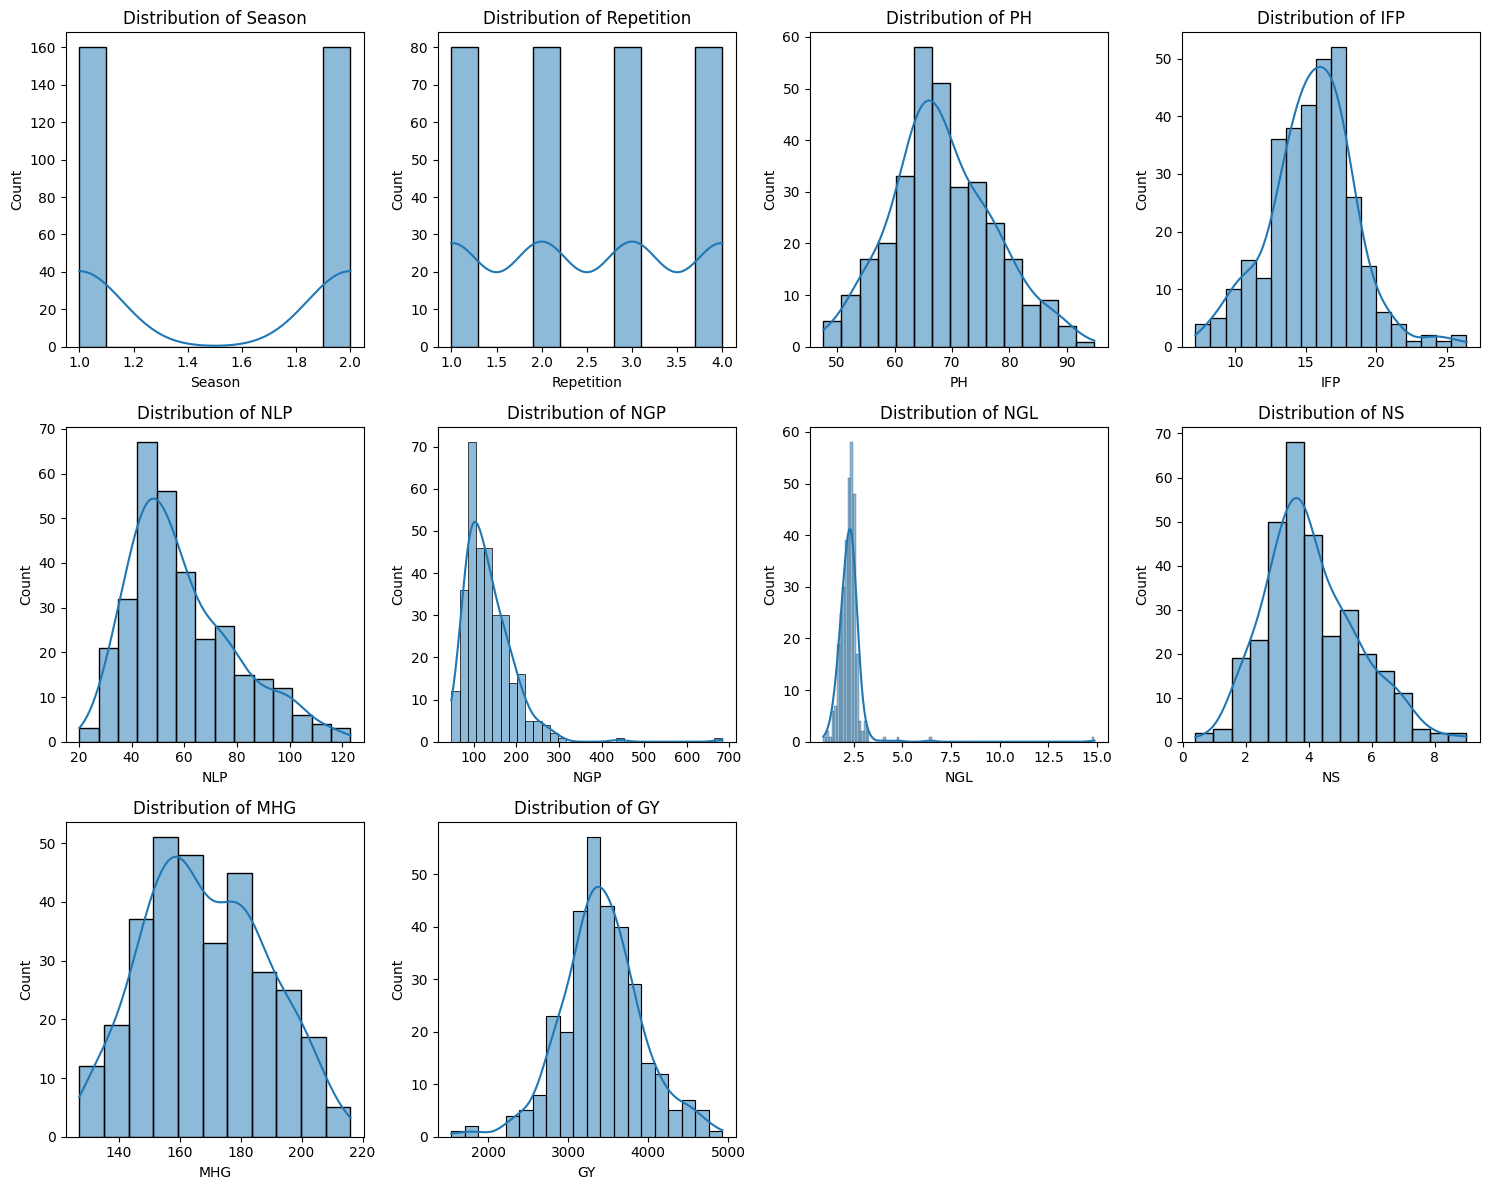

In [54]:
plt.figure(figsize=(15, 12))
for i, column in enumerate(df.drop(columns=['Cultivar'])):
    plt.subplot(3, 4, i+1)
    sns.histplot(df.drop(columns=['Cultivar'])[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

In [53]:
df_num = df.drop(columns=['Cultivar'])

skewness = df_num.skew()
skewness

Season         0.000000
Repetition     0.000000
PH             0.284015
IFP            0.075107
NLP            0.841235
NGP            3.145055
NGL           10.974418
NS             0.584583
MHG            0.139261
GY            -0.012001
dtype: float64

## Heatmap

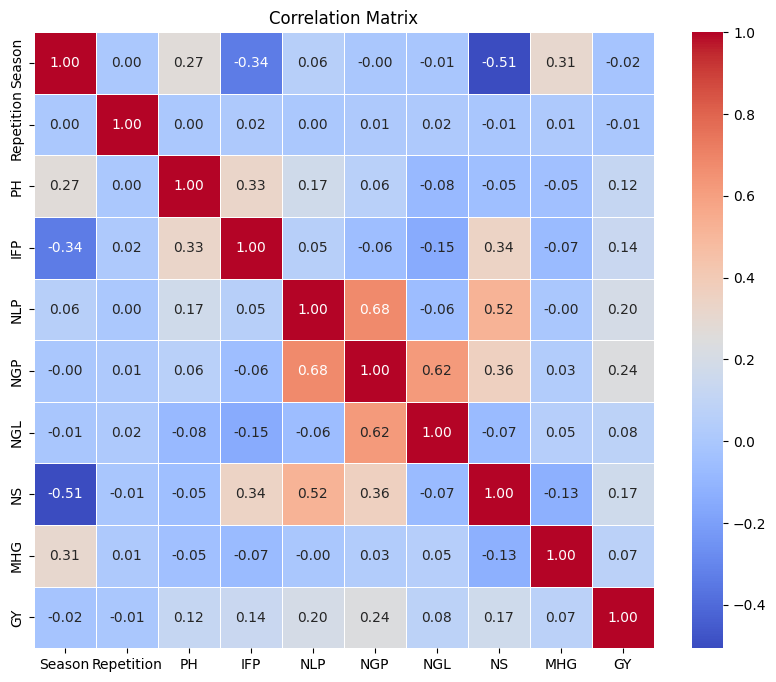

In [57]:
corr_matrix = df[numeric_columns].drop(columns=['Cultivar']).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


- 1: perfect positive correlation (as one variable increases, the other also increases)
- -1: perfect negative correlation (as one variable increases, the other decreases)
- 0: no correlation

In the heatmap:
- **Darker colors** => stronger correlations (closer to -1 or 1)
- **Lighter colors** => weaker correlations (closer to 0)


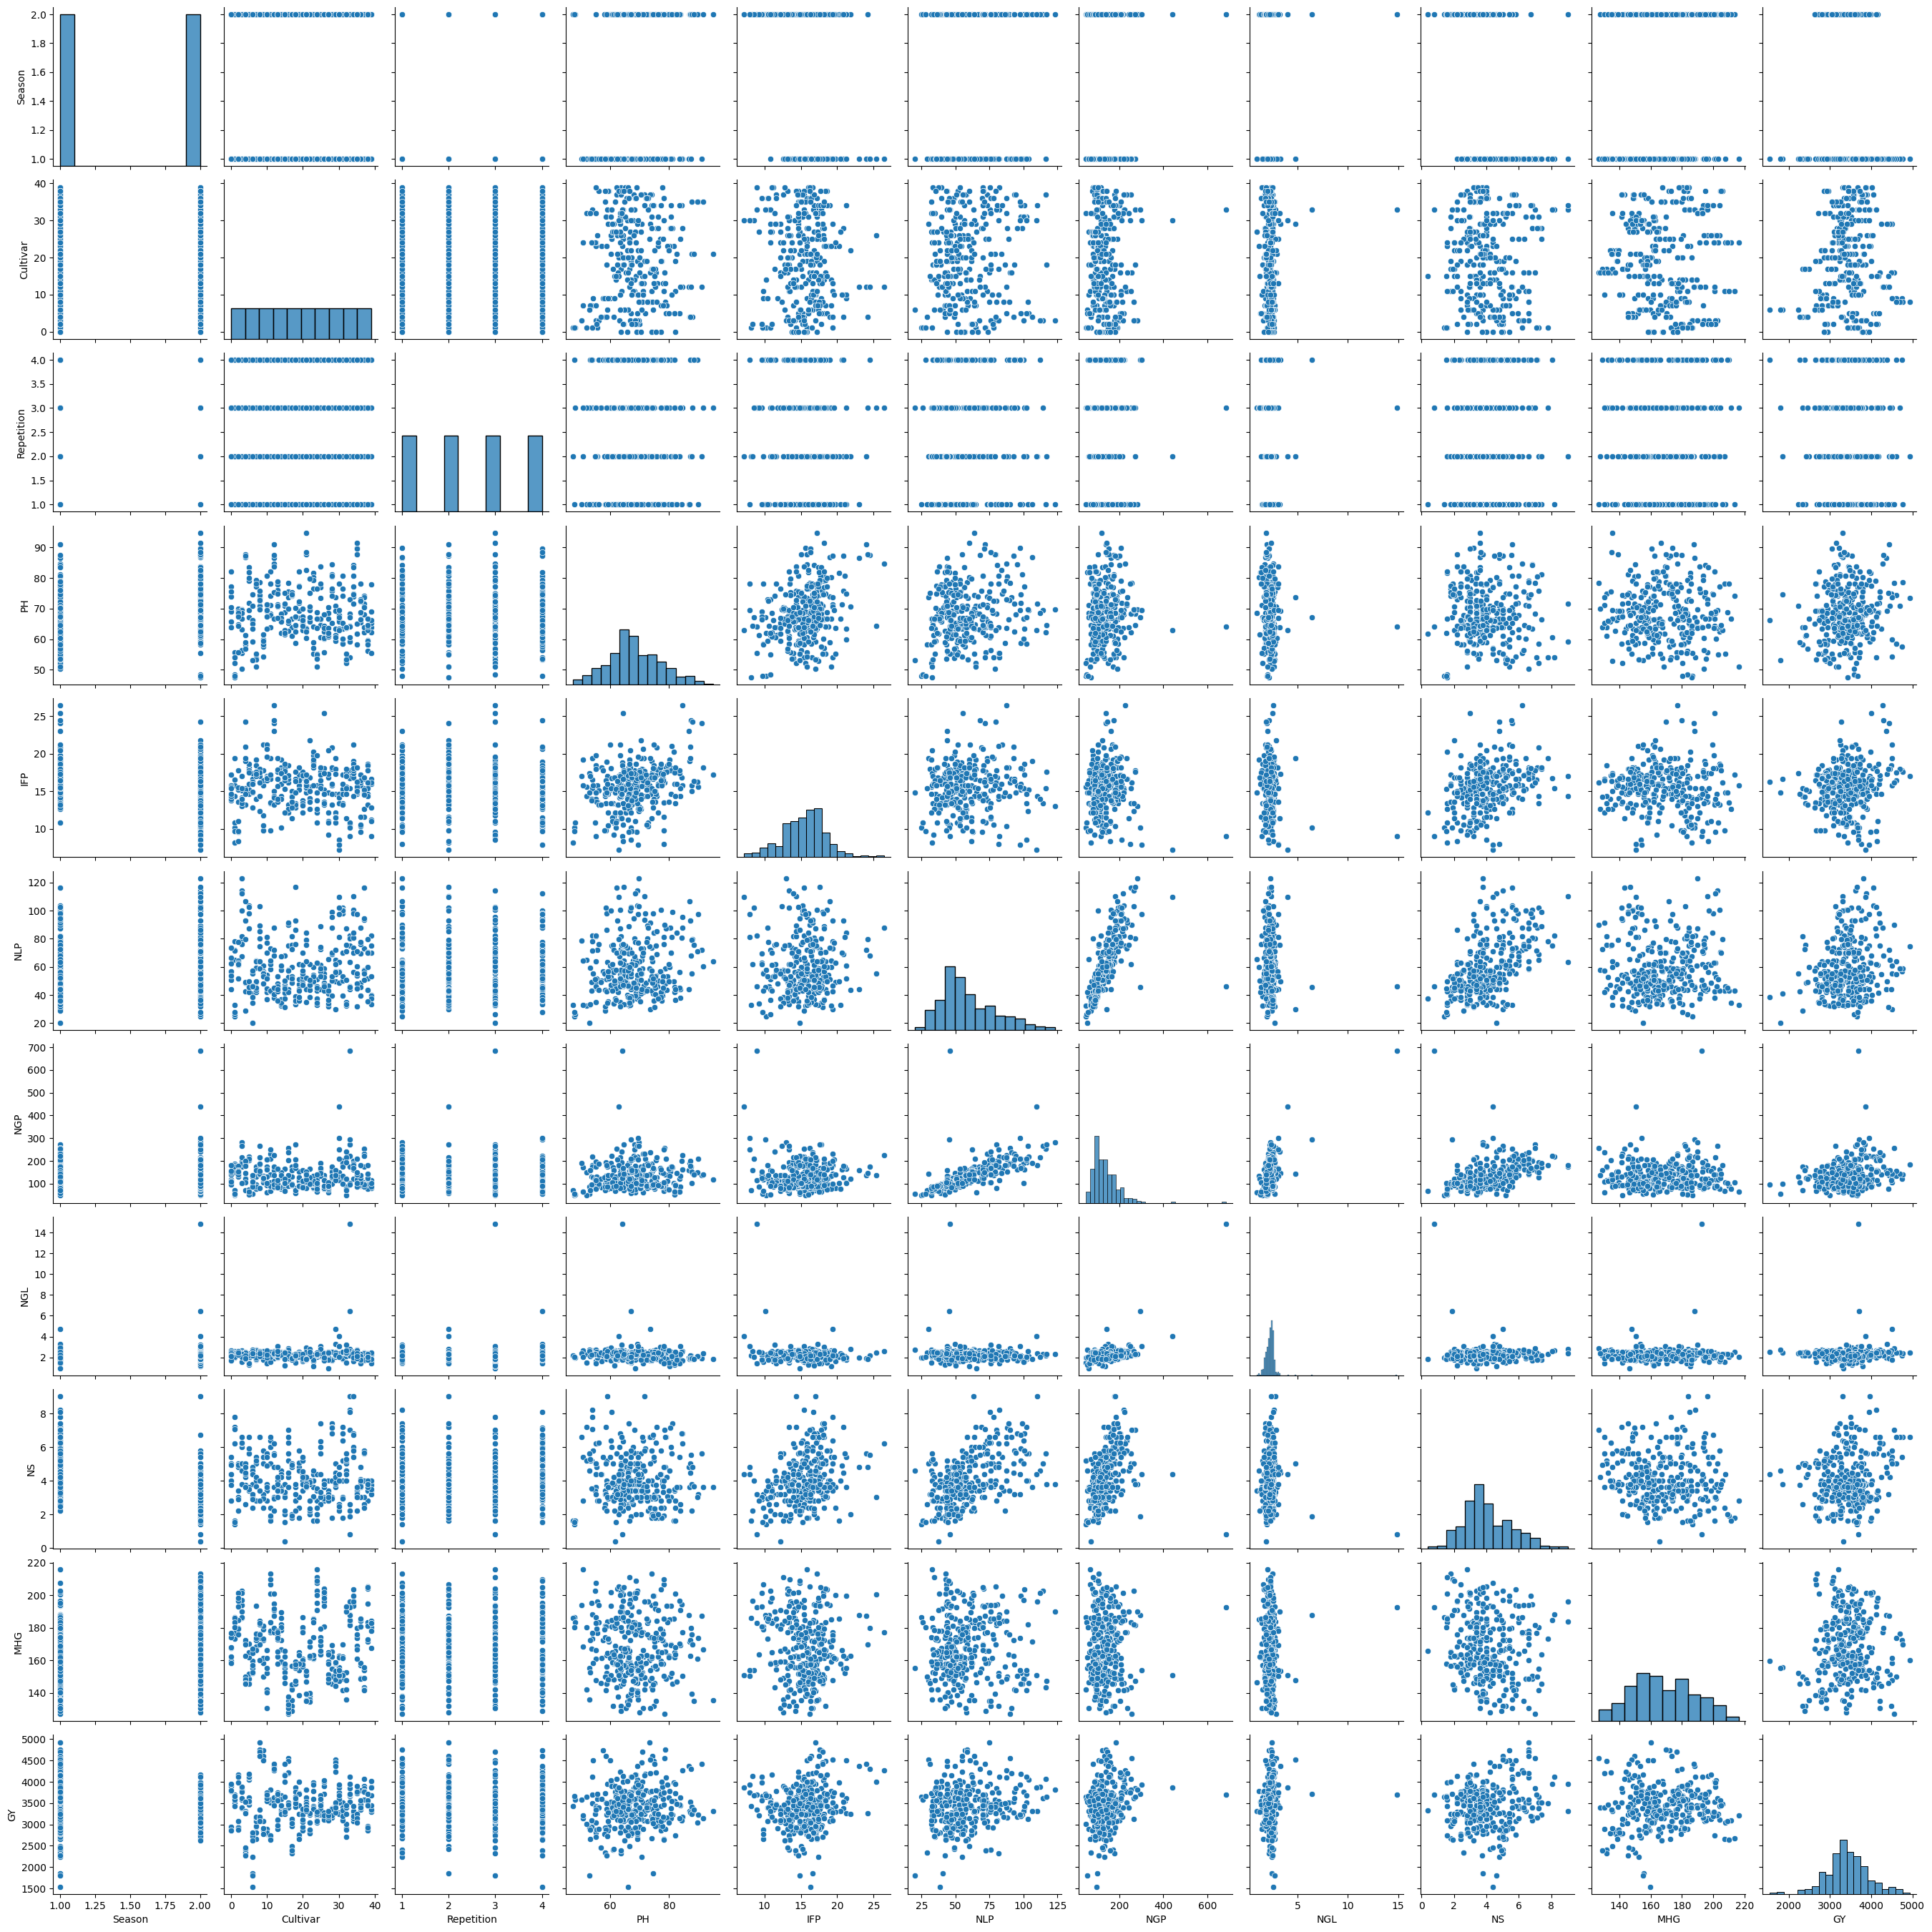

In [62]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

sns.pairplot(df[numerical_columns])
plt.show()